In [1]:
pip install pandas matplotlib

In [3]:
import pandas as pd

# Load the CSV files, specifying the delimiter and error handling
df1 = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')  # Try different delimiters if comma doesn't work
df2 = pd.read_csv('/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')
df3 = pd.read_csv('/content/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')

# Display the first few rows of each DataFrame
print(df1.head())
print(df2.head())
print(df3.head())

         Data Source World Development Indicators  Unnamed: 2
0  Last Updated Date                   2024-06-28         NaN
  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2      

Skipping line 5: expected 3 fields, saw 69
Skipping line 6: expected 3 fields, saw 69
Skipping line 7: expected 3 fields, saw 69
Skipping line 8: expected 3 fields, saw 69
Skipping line 9: expected 3 fields, saw 69
Skipping line 10: expected 3 fields, saw 69
Skipping line 11: expected 3 fields, saw 69
Skipping line 12: expected 3 fields, saw 69
Skipping line 13: expected 3 fields, saw 69
Skipping line 14: expected 3 fields, saw 69
Skipping line 15: expected 3 fields, saw 69
Skipping line 16: expected 3 fields, saw 69
Skipping line 17: expected 3 fields, saw 69
Skipping line 18: expected 3 fields, saw 69
Skipping line 19: expected 3 fields, saw 69
Skipping line 20: expected 3 fields, saw 69
Skipping line 21: expected 3 fields, saw 69
Skipping line 22: expected 3 fields, saw 69
Skipping line 23: expected 3 fields, saw 69
Skipping line 24: expected 3 fields, saw 69
Skipping line 25: expected 3 fields, saw 69
Skipping line 26: expected 3 fields, saw 69
Skipping line 27: expected 3 fields, 

In [4]:
# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

# Display the data types of each column
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)

Data Source                     0
World Development Indicators    0
Unnamed: 2                      1
dtype: int64
Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    138
TableName         0
Unnamed: 5      265
dtype: int64
INDICATOR_CODE         0
INDICATOR_NAME         0
SOURCE_NOTE            0
SOURCE_ORGANIZATION    0
Unnamed: 4             1
dtype: int64
Data Source                      object
World Development Indicators     object
Unnamed: 2                      float64
dtype: object
Country Code     object
Region           object
IncomeGroup      object
SpecialNotes     object
TableName        object
Unnamed: 5      float64
dtype: object
INDICATOR_CODE          object
INDICATOR_NAME          object
SOURCE_NOTE             object
SOURCE_ORGANIZATION     object
Unnamed: 4             float64
dtype: object


In [12]:
import pandas as pd

# Reload the CSV file, skipping the first few rows
df1 = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', skiprows=4)
df2 = pd.read_csv('/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')
df3 = pd.read_csv('/content/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')

# Display the first few rows of df1 again
print(df1.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [13]:
# Select relevant columns from df1
df1_relevant = df1[['Country Name', 'Country Code', 'Indicator Name', '1960', '1961', '1962', '1963', '1964', '1965']]

# Select relevant columns from df2
df2_relevant = df2[['Country Code', 'Region', 'IncomeGroup']]

# Select relevant columns from df3
df3_relevant = df3[['INDICATOR_CODE', 'INDICATOR_NAME']]

In [14]:
# Merge df1 and df2 on 'Country Code'
merged_df = pd.merge(df1_relevant, df2_relevant, on='Country Code')

# Merge the result with df3 on 'Indicator Name'
final_df = pd.merge(merged_df, df3_relevant, left_on='Indicator Name', right_on='INDICATOR_NAME')

In [15]:
# Drop rows with missing values
final_df = final_df.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0)
# final_df = final_df.fillna(0)

# Display the first few rows of the cleaned DataFrame
print(final_df.head())

                  Country Name Country Code     Indicator Name         1960  \
0                        Aruba          ABW  Population, total      54608.0   
1  Africa Eastern and Southern          AFE  Population, total  130692579.0   
2                  Afghanistan          AFG  Population, total    8622466.0   
3   Africa Western and Central          AFW  Population, total   97256290.0   
4                       Angola          AGO  Population, total    5357195.0   

          1961         1962         1963         1964         1965  \
0      55811.0      56682.0      57475.0      58178.0      58782.0   
1  134169237.0  137835590.0  141630546.0  145605995.0  149742351.0   
2    8790140.0    8969047.0    9157465.0    9355514.0    9565147.0   
3   99314028.0  101445032.0  103667517.0  105959979.0  108336203.0   
4    5441333.0    5521400.0    5599827.0    5673199.0    5736582.0   

                      Region          IncomeGroup INDICATOR_CODE  \
0  Latin America & Caribbean        

In [16]:
import matplotlib.pyplot as plt

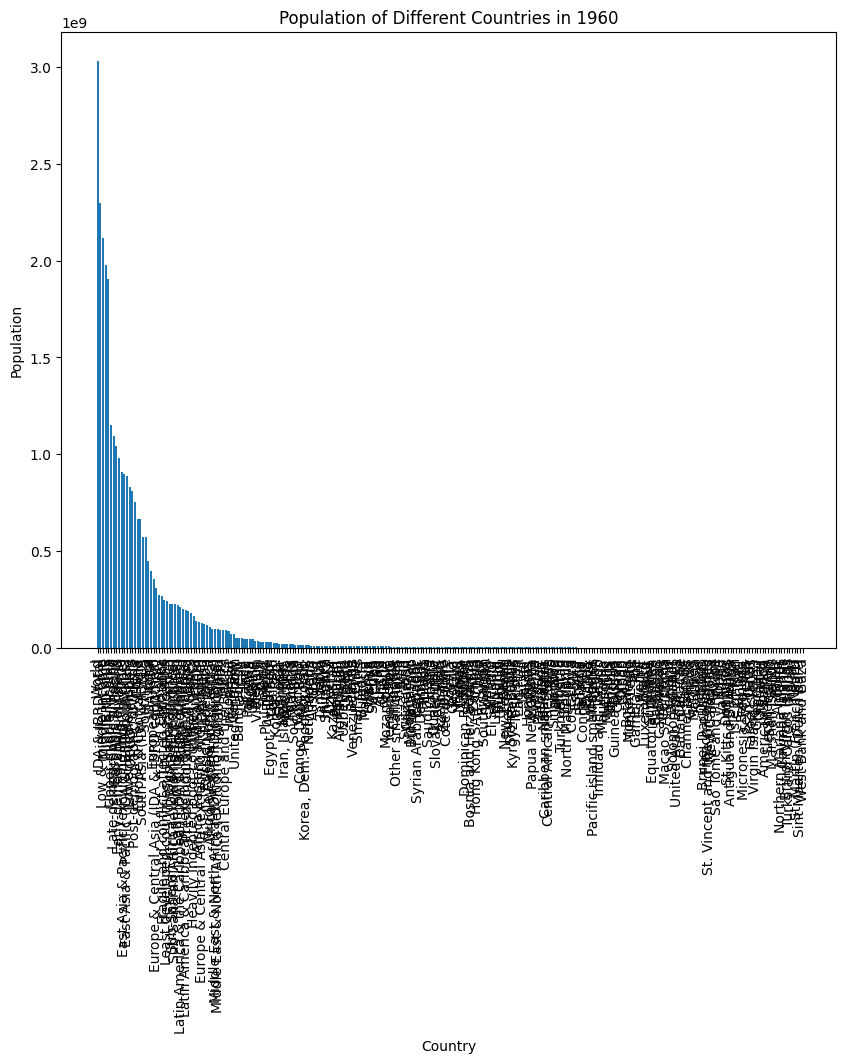

In [17]:
# Select data for a specific year
year = '1960'
data_for_year = final_df[['Country Name', year]]

# Sort the data by population
data_for_year = data_for_year.sort_values(by=year, ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(data_for_year['Country Name'], data_for_year[year])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title(f'Population of Different Countries in {year}')
plt.xticks(rotation=90)
plt.show()

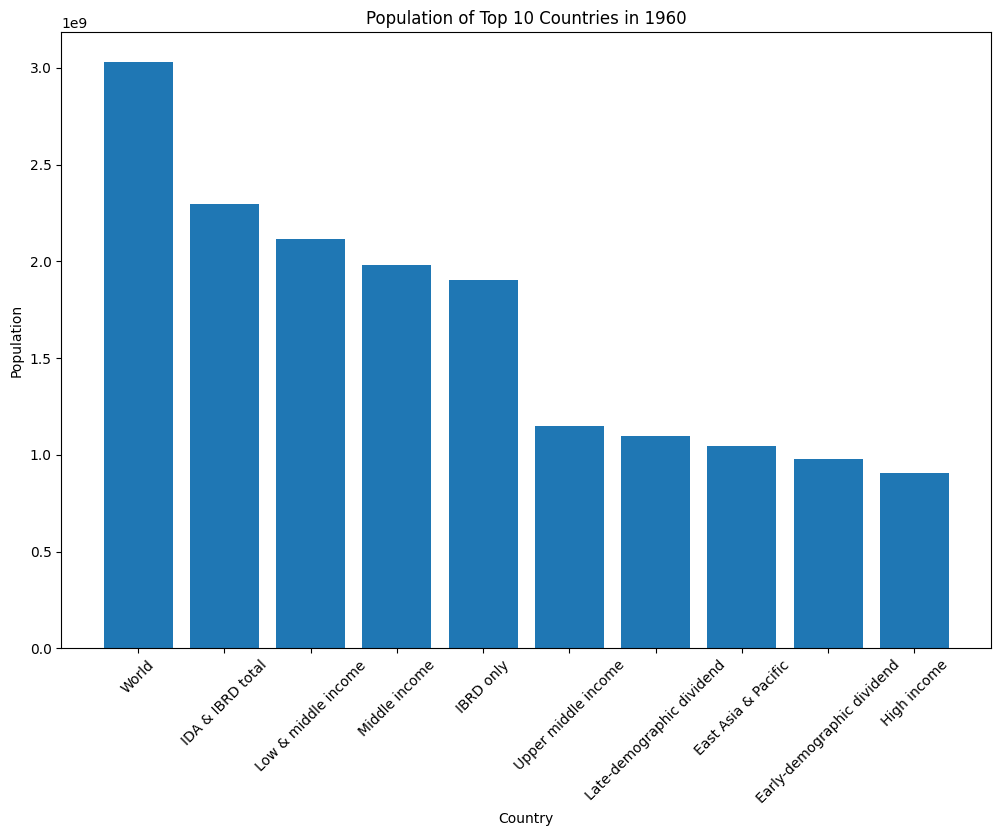

In [18]:
import matplotlib.pyplot as plt

# Select data for a specific year
year = '1960'
data_for_year = final_df[['Country Name', year]]

# Sort the data by population and select the top 10 countries
data_for_year = data_for_year.sort_values(by=year, ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(data_for_year['Country Name'], data_for_year[year])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title(f'Population of Top 10 Countries in {year}')
plt.xticks(rotation=45)
plt.show()

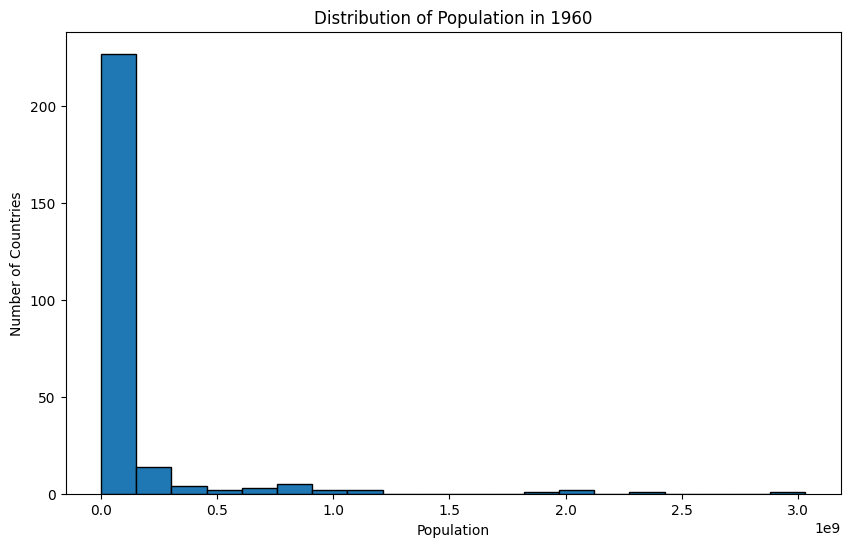

In [19]:
# Select data for a specific year
year = '1960'
population_data = final_df[year]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(population_data, bins=20, edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.title(f'Distribution of Population in {year}')
plt.show()

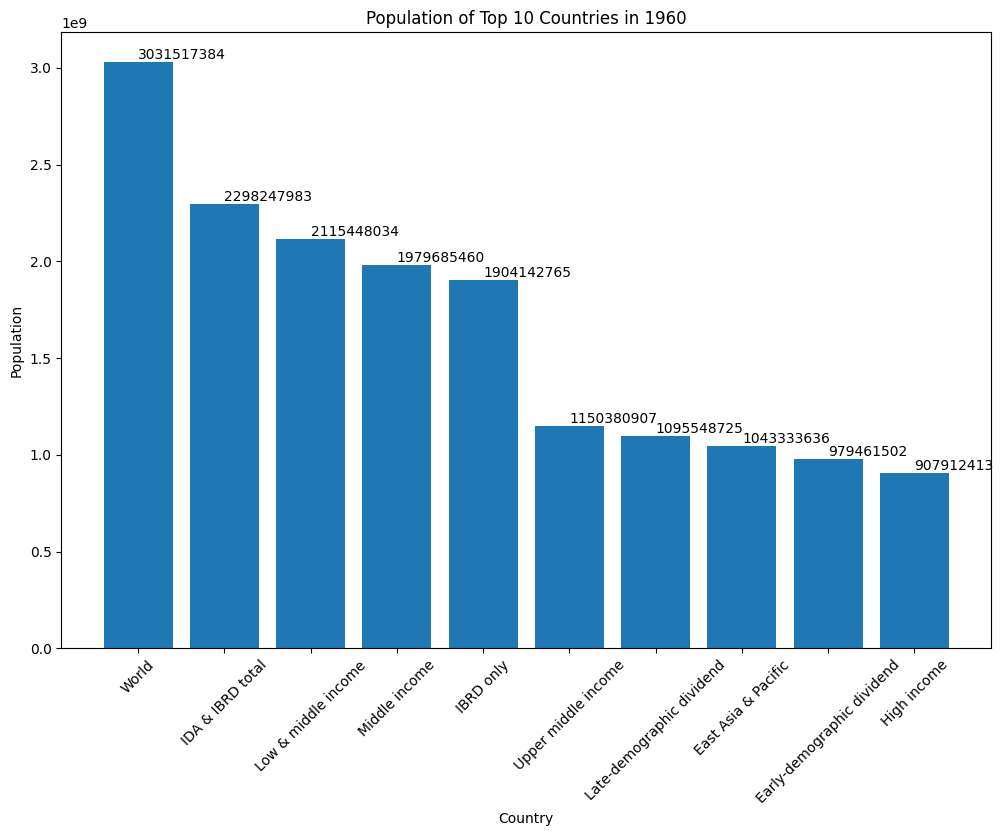

In [21]:
# Plot the bar chart with data labels
plt.figure(figsize=(12, 8))
bars = plt.bar(data_for_year['Country Name'], data_for_year[year])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title(f'Population of Top 10 Countries in {year}')
plt.xticks(rotation=45)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.savefig('population_bar_chart_with_labels.png')
plt.show()


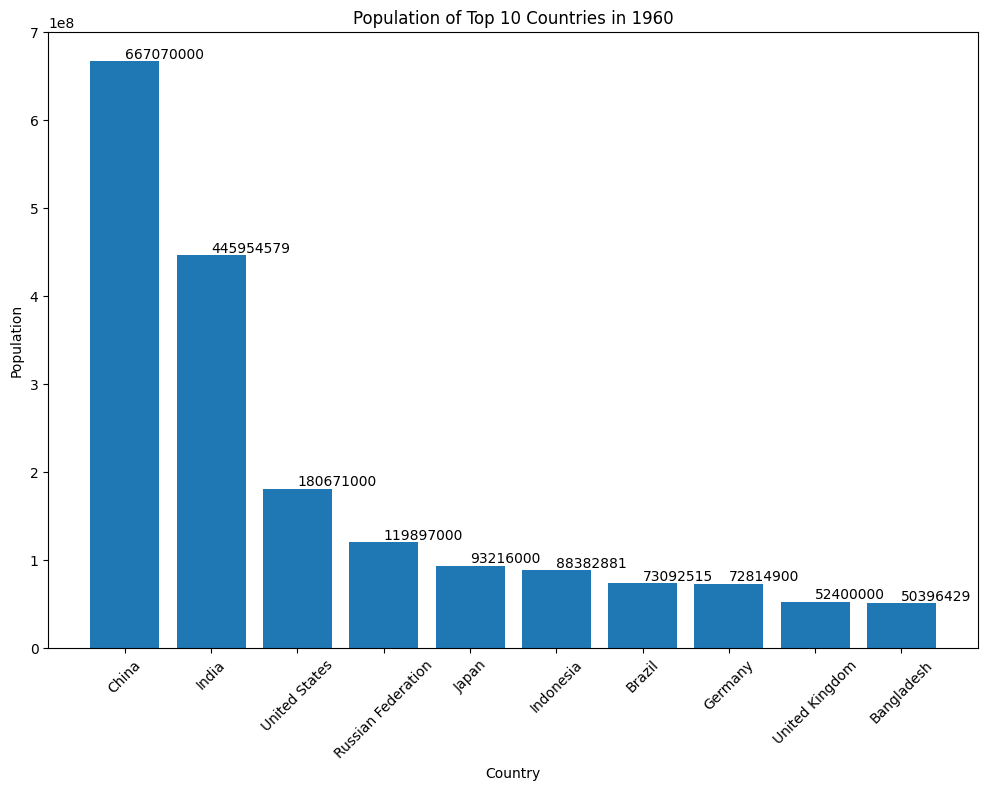

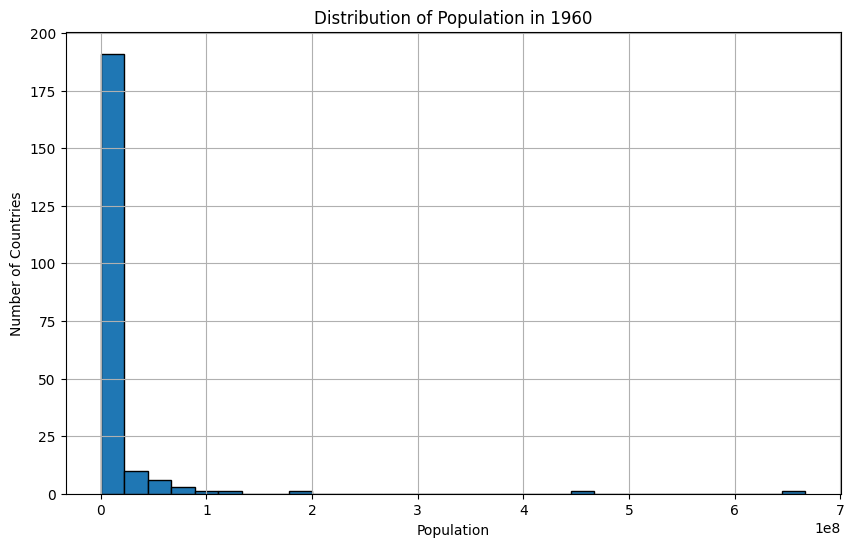

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files, specifying the delimiter and error handling
df1 = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn', skiprows=4)
df2 = pd.read_csv('/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')
df3 = pd.read_csv('/content/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', sep=',', on_bad_lines='warn')

# Select relevant columns
df1_relevant = df1[['Country Name', 'Country Code', 'Indicator Name', '1960', '1961', '1962', '1963', '1964', '1965']]
df2_relevant = df2[['Country Code', 'Region', 'IncomeGroup']]
df3_relevant = df3[['INDICATOR_CODE', 'INDICATOR_NAME']]

# Merge DataFrames
merged_df = pd.merge(df1_relevant, df2_relevant, on='Country Code')
final_df = pd.merge(merged_df, df3_relevant, left_on='Indicator Name', right_on='INDICATOR_NAME')

# Handle missing values
final_df = final_df.dropna()

# Create and save bar chart
year = '1960'
data_for_year = final_df[['Country Name', year]].sort_values(by=year, ascending=False).head(10)
plt.figure(figsize=(12, 8))
bars = plt.bar(data_for_year['Country Name'], data_for_year[year])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title(f'Population of Top 10 Countries in {year}')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
plt.savefig('population_bar_chart_with_labels.png')
plt.show()

# Create and save histogram
population_data = final_df[year]
plt.figure(figsize=(10, 6))
plt.hist(population_data, bins=30, edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.title(f'Distribution of Population in {year}')
plt.grid(True)
plt.savefig('population_histogram_customized.png')
plt.show()
